In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import json
from datetime import datetime

import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pio.renderers.default = "notebook"
pio.templates.default = "plotly_white"


# this enables relative path imports
import os
from dotenv import load_dotenv
load_dotenv()
_PROJECT_PATH: str = os.environ["_project_path"]
_PICKLED_DATA_FILENAME: str = os.environ["_pickled_data_filename"]

import sys
from pathlib import Path
project_path = Path(_PROJECT_PATH)
sys.path.append(str(project_path))

import config_v2 as cfg

from library_report_v2 import Cleaning as cln
from library_report_v2 import Graphing as grp
from library_report_v2 import Processing as pro
from library_report_v2 import Configuration as repcfg

In [24]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
periodo_historico = cfg.BASELINE
periodo_de_estudio = cfg.STUDY

In [26]:
def show_response_contents(df):
    print("The response contains:")
    print(json.dumps(list(df['variable'].unique()), sort_keys=True, indent=4))
    print(json.dumps(list(df['device'].unique()), sort_keys=True, indent=4))

In [27]:
df = pd.read_pickle(project_path / 'data' / _PICKLED_DATA_FILENAME)

In [37]:
df = df.sort_values(by=['variable','datetime'])
df = pro.datetime_attributes(df)

In [38]:
df_chiller = df.copy()
df_chiller = df_chiller[df_chiller['variable'].isin(['eficiencia-chiller','factor-de-potencia','potencia-termica','potencia-activa','factor-carga-chiller'])]

In [40]:
df_chiller = df_chiller[df_chiller['device'].isin(['cvl---chiller'])]
#df_chiller_2 = df_chiller.copy()

In [42]:
df_chiller = df_chiller.groupby(['variable','hour'])['value'].mean().reset_index()
df_chiller

,variable,hour,value
0,eficiencia-chiller,0,0.715409
1,eficiencia-chiller,1,0.703949
2,eficiencia-chiller,2,0.708610
3,eficiencia-chiller,3,0.713956
4,eficiencia-chiller,4,0.706336
...,...,...,...
115,potencia-termica,19,170.447565
116,potencia-termica,20,163.725671
117,potencia-termica,21,163.063011
118,potencia-termica,22,159.992220


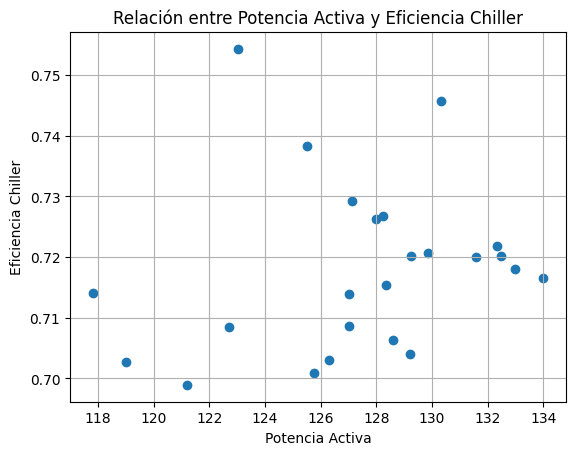

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo las filas donde la columna "variable" sea "eficiencia-chiller"
df_eficiencia_chiller = df_chiller[df_chiller['variable'] == 'eficiencia-chiller']

# Obtener los valores de eficiencia-chiller y factor-de-potencia
valores_eficiencia_chiller = df_eficiencia_chiller['value']
valores_factor_potencia = df_chiller[df_chiller['variable'] == 'potencia-activa']['value']

# Graficar
plt.scatter(valores_factor_potencia, valores_eficiencia_chiller)
plt.xlabel('Potencia Activa')
plt.ylabel('Eficiencia Chiller')
plt.title('Relación entre Potencia Activa y Eficiencia Chiller')
plt.grid(True)
plt.show()


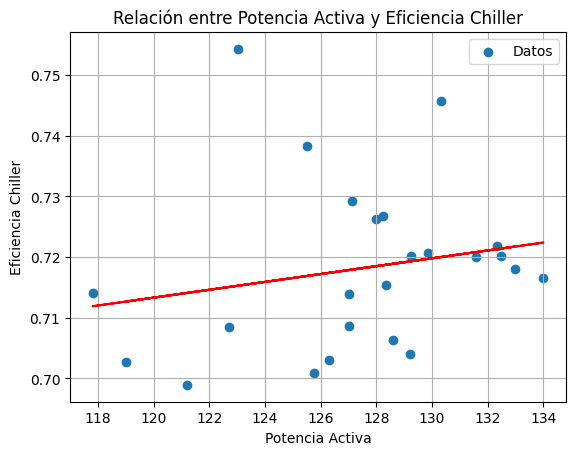

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filtrar el DataFrame para obtener solo las filas donde la columna "variable" sea "eficiencia-chiller"
df_eficiencia_chiller = df_chiller[df_chiller['variable'] == 'eficiencia-chiller']

# Obtener los valores de eficiencia-chiller y factor-de-potencia
valores_eficiencia_chiller = df_eficiencia_chiller['value']
valores_factor_potencia = df_chiller[df_chiller['variable'] == 'potencia-activa']['value']

# Convertir los datos a matrices numpy y darles forma adecuada para la regresión lineal
X = valores_factor_potencia.values.reshape(-1, 1)
y = valores_eficiencia_chiller.values.reshape(-1, 1)

# Realizar la regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Calcular la pendiente y la intersección para la línea de regresión
pendiente = modelo.coef_[0][0]
interseccion = modelo.intercept_[0]

# Graficar los puntos de datos
plt.scatter(valores_factor_potencia, valores_eficiencia_chiller, label='Datos')

# Graficar la línea de regresión
plt.plot(X, modelo.predict(X), color='red') #label=f'Línea de Regresión: y = {pendiente:.2f}x + {interseccion:.2f}')

plt.xlabel('Potencia Activa')
plt.ylabel('Eficiencia Chiller')
plt.title('Relación entre Potencia Activa y Eficiencia Chiller')
plt.legend()
plt.grid(True)
plt.show()


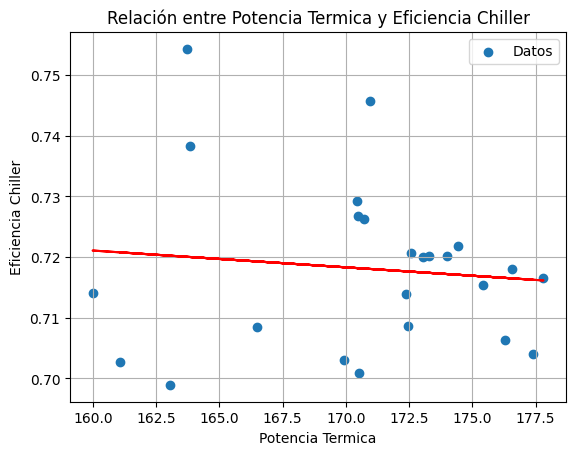

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filtrar el DataFrame para obtener solo las filas donde la columna "variable" sea "eficiencia-chiller"
df_eficiencia_chiller = df_chiller[df_chiller['variable'] == 'eficiencia-chiller']

# Obtener los valores de eficiencia-chiller y factor-de-potencia
valores_eficiencia_chiller = df_eficiencia_chiller['value']
valores_factor_potencia = df_chiller[df_chiller['variable'] == 'potencia-termica']['value']

# Convertir los datos a matrices numpy y darles forma adecuada para la regresión lineal
X = valores_factor_potencia.values.reshape(-1, 1)
y = valores_eficiencia_chiller.values.reshape(-1, 1)

# Realizar la regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Calcular la pendiente y la intersección para la línea de regresión
pendiente = modelo.coef_[0][0]
interseccion = modelo.intercept_[0]

# Graficar los puntos de datos
plt.scatter(valores_factor_potencia, valores_eficiencia_chiller, label='Datos')

# Graficar la línea de regresión
plt.plot(X, modelo.predict(X), color='red')

plt.xlabel('Potencia Termica')
plt.ylabel('Eficiencia Chiller')
plt.title('Relación entre Potencia Termica y Eficiencia Chiller')
plt.legend()
plt.grid(True)
plt.show()


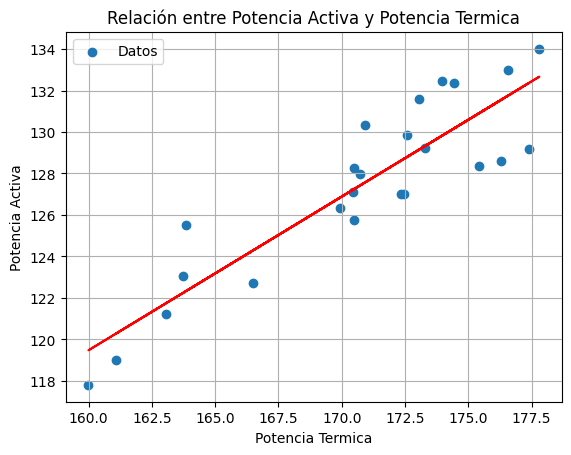

In [46]:

# Filtrar el DataFrame para obtener solo las filas donde la columna "variable" sea "eficiencia-chiller"
df_eficiencia_chiller = df_chiller[df_chiller['variable'] == 'potencia-activa']

# Obtener los valores de eficiencia-chiller y factor-de-potencia
valores_eficiencia_chiller = df_eficiencia_chiller['value']
valores_factor_potencia = df_chiller[df_chiller['variable'] == 'potencia-termica']['value']

# Convertir los datos a matrices numpy y darles forma adecuada para la regresión lineal
X = valores_factor_potencia.values.reshape(-1, 1)
y = valores_eficiencia_chiller.values.reshape(-1, 1)

# Realizar la regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Calcular la pendiente y la intersección para la línea de regresión
pendiente = modelo.coef_[0][0]
interseccion = modelo.intercept_[0]

# Graficar los puntos de datos
plt.scatter(valores_factor_potencia, valores_eficiencia_chiller, label='Datos')

# Graficar la línea de regresión
plt.plot(X, modelo.predict(X), color='red')

plt.xlabel('Potencia Termica')
plt.ylabel('Potencia Activa')
plt.title('Relación entre Potencia Activa y Potencia Termica')
plt.legend()
plt.grid(True)
plt.show()

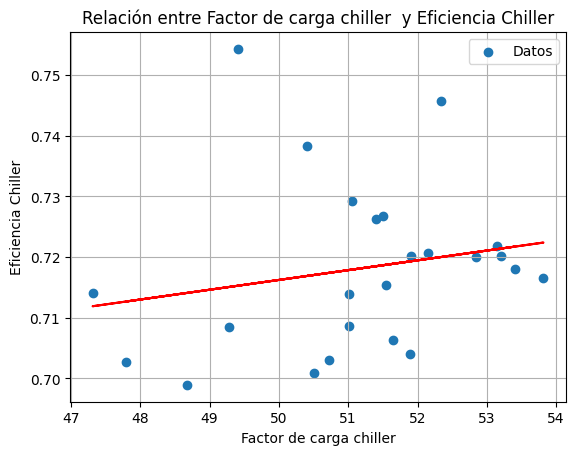

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filtrar el DataFrame para obtener solo las filas donde la columna "variable" sea "eficiencia-chiller"
df_eficiencia_chiller = df_chiller[df_chiller['variable'] == 'eficiencia-chiller']

# Obtener los valores de eficiencia-chiller y factor-de-potencia
valores_eficiencia_chiller = df_eficiencia_chiller['value']
valores_factor_potencia = df_chiller[df_chiller['variable'] == 'factor-carga-chiller']['value']

# Convertir los datos a matrices numpy y darles forma adecuada para la regresión lineal
X = valores_factor_potencia.values.reshape(-1, 1)
y = valores_eficiencia_chiller.values.reshape(-1, 1)

# Realizar la regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Calcular la pendiente y la intersección para la línea de regresión
pendiente = modelo.coef_[0][0]
interseccion = modelo.intercept_[0]

# Graficar los puntos de datos
plt.scatter(valores_factor_potencia, valores_eficiencia_chiller, label='Datos')

# Graficar la línea de regresión
plt.plot(X, modelo.predict(X), color='red')

plt.xlabel('Factor de carga chiller')
plt.ylabel('Eficiencia Chiller')
plt.title('Relación entre Factor de carga chiller  y Eficiencia Chiller')
plt.legend()
plt.grid(True)
plt.show()
